## Data cleaning

In [58]:
import pandas as pd

In [59]:
df = pd.read_csv('data.csv')
df.head()

,_id,group_id,num_requests,parent_closed,status_name,status_code,dept,request_type_name,request_type_id,create_date_et,...,cross_street_id,city,neighborhood,census_tract,council_district,ward,police_zone,latitude,longitude,geo_accuracy
0,1,827262,1,f,open,0,DPW - Administration,Park Shelter,543,2024-03-12T10:50:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
1,2,720661,1,f,open,0,DPW - Administration,Park Shelter,543,2023-03-20T07:52:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
2,3,722010,1,f,open,0,DPW - Administration,Park Shelter,543,2023-03-24T07:44:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
3,4,846915,1,f,open,0,Police - Zones 1-6,Illegal Parking,417,2024-05-19T12:24:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
4,5,853708,1,f,open,0,DPW - Facilities,City Facility,375,2024-06-06T23:04:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES


In [61]:
duplicate_groups = df['group_id'][df['group_id'].duplicated()]
print(duplicate_groups.nunique())
print(duplicate_groups.value_counts())

0
Series([], Name: count, dtype: int64)


In [62]:
df_snow = df[df['request_type_name'].str.contains('Snow/Ice Removal', case=False, na=False)]
df_snow.head()

,_id,group_id,num_requests,parent_closed,status_name,status_code,dept,request_type_name,request_type_id,create_date_et,...,cross_street_id,city,neighborhood,census_tract,council_district,ward,police_zone,latitude,longitude,geo_accuracy
423,424,604051,1,f,open,0,DOMI - Permits,"Sidewalk, Lack of Snow/Ice Removal",558,2022-02-02T11:30:00,...,0.0,Pittsburgh,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,EXACT
463,464,694389,1,f,open,0,DOMI - Permits,"Sidewalk, Lack of Snow/Ice Removal",558,2022-11-17T08:30:00,...,0.0,Pittsburgh,NaN,4.200302e+10,6.0,NaN,NaN,40.446432,-79.999620,EXACT
1430,1431,606017,1,f,open,0,DOMI - Permits,"Sidewalk, Lack of Snow/Ice Removal",558,2022-02-07T09:53:00,...,0.0,Pittsburgh,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,EXACT
1877,1878,811542,1,t,closed,1,DPW - Street Maintenance,Snow/Ice removal,494,2024-01-18T07:37:00,...,0.0,Pittsburgh,NaN,4.200316e+10,3.0,NaN,NaN,40.432962,-79.973672,EXACT
1994,1995,596039,1,f,open,0,DPW - Street Maintenance,Snow/Ice removal,494,2022-01-18T09:48:00,...,0.0,Pittsburgh,Summer Hill,4.200326e+10,1.0,26.0,1.0,40.483512,-80.003578,EXACT


In [63]:
df_snow_unique = df_snow.sort_values(by='create_date_et').drop_duplicates(subset='group_id', keep='first')

In [64]:
df_snow_unique['create_date_et'] = pd.to_datetime(df['create_date_et'])
df_daily = df_snow_unique.groupby(df_snow_unique['create_date_et'].dt.date).size().reset_index(name='num_requests')


df_daily['date'] = pd.to_datetime(df_daily['create_date_et'])
df_daily.set_index('date', inplace=True)
ts = df_daily['num_requests'].asfreq('D')

In [65]:
ts = df_daily['num_requests'].asfreq('D').fillna(0)

In [66]:
ts

date
2015-04-22     1.0
2015-04-23     0.0
2015-04-24     0.0
2015-04-25     0.0
2015-04-26     0.0
              ... 
2024-12-12    38.0
2024-12-13    49.0
2024-12-14     0.0
2024-12-15     0.0
2024-12-16     2.0
Freq: D, Name: num_requests, Length: 3527, dtype: float64

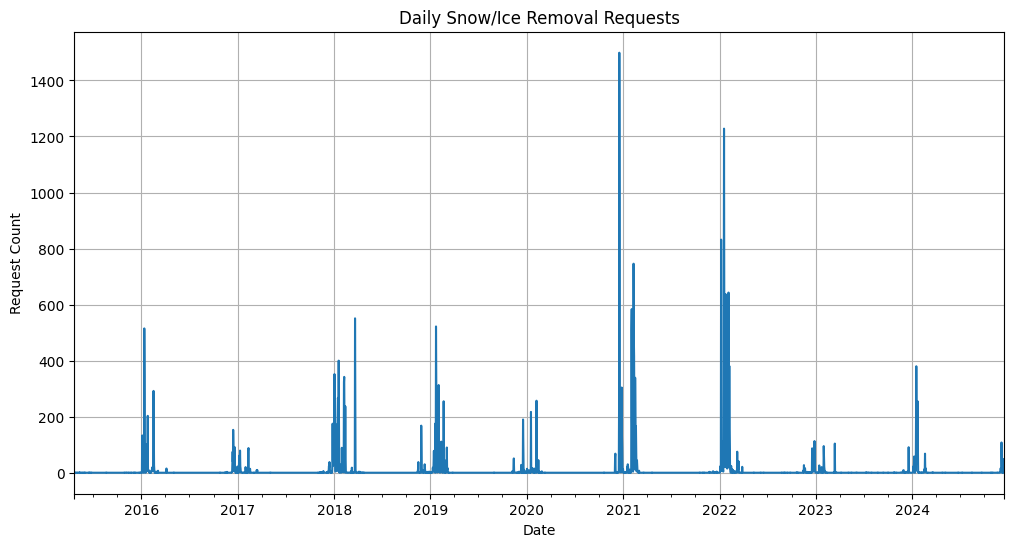

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
ts.plot(title='Daily Snow/Ice Removal Requests')
plt.xlabel('Date')
plt.ylabel('Request Count')
plt.grid()
plt.show()

In [68]:
ts_monthly = ts.resample('ME').sum()
ts_monthly

date
2015-04-30      2.0
2015-05-31      5.0
2015-06-30      4.0
2015-07-31      0.0
2015-08-31      1.0
              ...  
2024-08-31      1.0
2024-09-30      1.0
2024-10-31      1.0
2024-11-30      7.0
2024-12-31    286.0
Freq: ME, Name: num_requests, Length: 117, dtype: float64

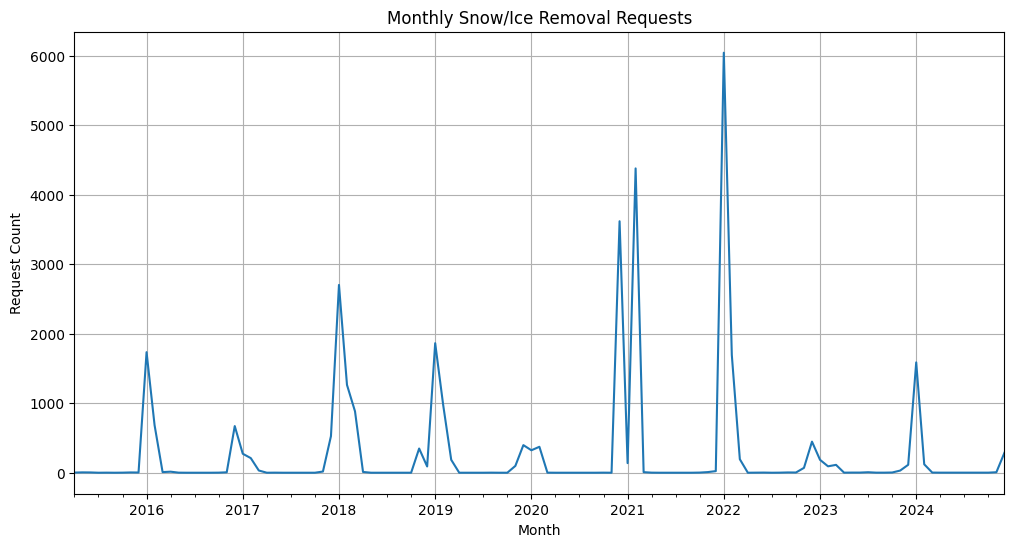

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
ts_monthly.plot(title='Monthly Snow/Ice Removal Requests')
plt.xlabel('Month')
plt.ylabel('Request Count')
plt.grid()
plt.show()

In [70]:
df_snow = pd.read_csv('Snowfalldata.csv')
df_snow

,Year,Jan,Feb,Mar,Apr,May,Oct,Nov,Dec,Total
0,2015,18.5,15.4,9.0,0.3,0.0,0.1,0.1,0.3,43.7
1,2016,14.6,9.5,2.1,3.1,0.1,0.0,2.1,6.0,37.5
2,2017,7.5,6.7,9.7,0.1,0.0,0.0,0.1,13.3,37.4
3,2018,17.2,9.7,12.3,7.3,0.0,0.1,3.6,2.0,52.2
4,2019,12.9,12.9,5.2,0.1,0.0,0.1,3.0,4.6,38.8
5,2020,4.9,8.8,1.0,0.1,0.1,0.0,0.8,27.5,43.2
6,2021,12.0,16.1,0.1,2.4,0.0,0.0,1.5,0.7,32.8
7,2022,19.2,5.8,17.1,0.9,0.0,0.0,3.3,2.9,49.2
8,2023,8.1,0.2,3.1,0.1,0.1,0.1,0.6,1.1,13.4
9,2024,9.9,4.2,0.5,0.1,0.0,0.1,0.8,5.7,21.3


In [71]:
snow_data = {
    2015: [18.5, 15.4, 9, 0.3, 0, 0, 0, 0, 0, 0.1, 0.1, 0.3],
    2016: [14.6, 9.5, 2.1, 3.1, 0.1, 0, 0, 0, 0, 0, 2.1, 6],
    2017: [7.5, 6.7, 9.7, 0.1, 0, 0, 0, 0, 0, 0, 0.1, 13.3],
    2018: [17.2, 9.7, 12.3, 7.3, 0,0,0, 0, 0, 0.1, 3.6, 2],
    2019: [12.9, 12.9, 5.2, 0.1, 0, 0, 0, 0,0, 0.1, 3, 4.6],
    2020: [4.9, 8.8, 1.0, 0.1, 0.1, 0, 0,0, 0, 0.1, 0.8, 27.5],
    2021: [12, 16.1, 0.1, 2.4, 0, 0, 0, 0,0, 0, 1.5, 0.7],
    2022: [19.2, 5.8, 17.1, 0.9, 0, 0, 0,0, 0, 0, 3.3, 2.9],
    2023: [8.1, 0.2, 3.1, 0.1, 0.1, 0, 0, 0, 0, 0.1, 0.6, 1.1],
    2024: [9.9, 4.2, 0.5, 0.1, 0, 0, 0,0, 0, 0.1, 0.8, 5.7],
}

snowfall_records = []
for year, values in snow_data.items():
    for month, snow in enumerate(values, start=1):
        date = pd.Timestamp(year=year, month=month, day=1) + pd.offsets.MonthEnd(0)
        snowfall_records.append((date, snow))

df_snow = pd.DataFrame(snowfall_records, columns=['date', 'snowfall']).set_index('date')

df_all = pd.concat([ts_monthly.rename("num_requests"), df_snow], axis=1).dropna()
df_all.head()
df_all_snow = df_all.copy()
snow = df_all[['snowfall']]

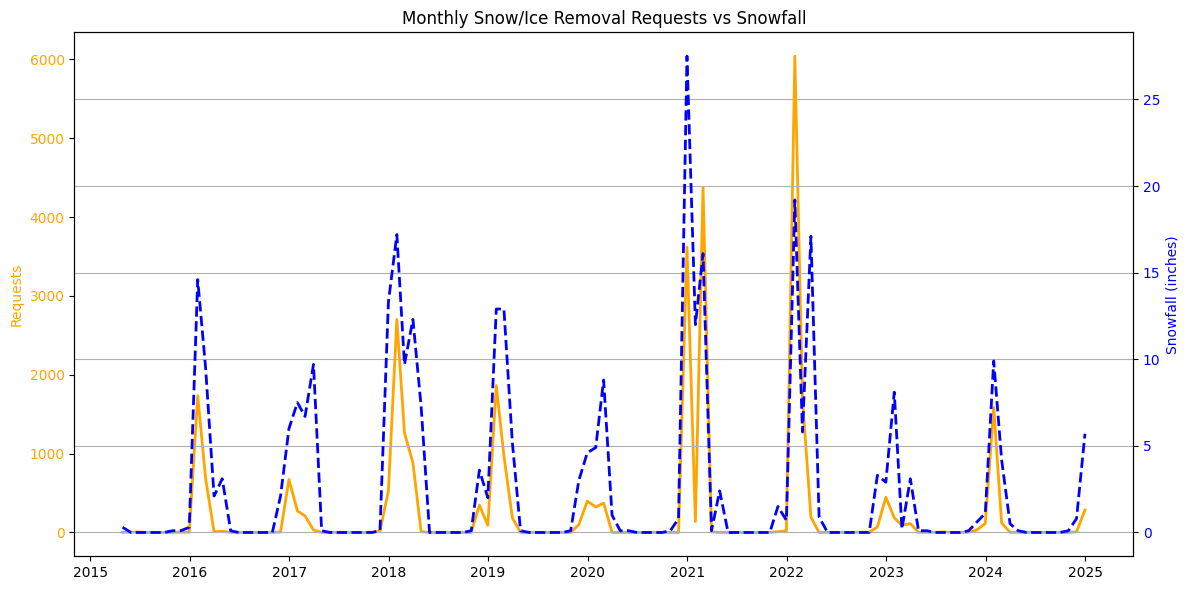

In [72]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(ts_monthly.index, ts_monthly, label='Requests', color='orange', linewidth=2)
ax1.set_ylabel('Requests', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx()
ax2.plot(ts_monthly.index, snow, label='Snowfall', color='blue', linestyle='--', linewidth=2)
ax2.set_ylabel('Snowfall (inches)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Monthly Snow/Ice Removal Requests vs Snowfall')
fig.tight_layout()
plt.grid()
plt.show()

# SARIMA

#### Check stationarity of the monthly request count using Augmented Dickey-Fuller test.
#### ADF test is used to determine whether differencing is needed before applying SARIMA.

In [73]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_monthly)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.6226417782733003
p-value: 0.08840737981506619


#### Result: ADF Statistic = -2.62, p-value = 0.088 > 0.05, the series is non-stationary.

#### Apply first-order differencing to make the time series stationary.
#### Run the ADF test again on the differenced series.
#### Result: p-value ≈ 0 → the differenced series is stationary and suitable for SARIMA modeling.
#### In SARIMA, d=1

In [74]:

ts_monthly_diff =ts_monthly.diff().dropna()

from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_monthly_diff.dropna())
print(f"p-value: {result[1]}")  

p-value: 1.7507635687294415e-09


####  Create lag features and rolling average for snowfall to capture temporal dependencies.
#### Drop missing values created by shifting.
#### Split the dataset into training and testing sets (last 24 months as test set).


In [75]:
from sklearn.preprocessing import StandardScaler

test_size = 23

df_all['snow_lag1'] = df_all['snowfall'].shift(1)
df_all['snow_lag2'] = df_all['snowfall'].shift(2)
df_all['snow_ma3'] = df_all['snowfall'].rolling(window=3).mean()
df_all = df_all.dropna()
from scipy.stats import boxcox
train, test = df_all.iloc[:-test_size], df_all.iloc[-test_size:]
test.columns

Index(['num_requests', 'snowfall', 'snow_lag1', 'snow_lag2', 'snow_ma3'], dtype='object')

#### Standardize snowfall-related features using StandardScaler.
#### Apply Box-Cox transformation to stabilize variance in the target variable (num_requests).

In [76]:
from sklearn.preprocessing import StandardScaler

from scipy.special import boxcox as boxcox_transform
scaler = StandardScaler()
feature_cols = ['snowfall', 'snow_lag1', 'snow_lag2', 'snow_ma3']
scaler.fit(train[feature_cols])
train_scaled = pd.DataFrame(scaler.transform(train[feature_cols]),
                        columns=[f"{col}_scaled" for col in feature_cols],
                        index=train.index)

test_scaled = pd.DataFrame(scaler.transform(test[feature_cols]),
                       columns=[f"{col}_scaled" for col in feature_cols],
                       index=test.index)


train = pd.concat([train, train_scaled], axis=1)
test = pd.concat([test, test_scaled], axis=1)
train_transformed, lambda_ = boxcox(train['num_requests'] + 1)
train['requests_transformed'] = train_transformed
test['requests_transformed'] = boxcox_transform(test['num_requests'] + 1, lambda_)
test.columns

Index(['num_requests', 'snowfall', 'snow_lag1', 'snow_lag2', 'snow_ma3',
       'snowfall_scaled', 'snow_lag1_scaled', 'snow_lag2_scaled',
       'snow_ma3_scaled', 'requests_transformed'],
      dtype='object')

#### Perform seasonal decomposition on the transformed request data to better understand its structure.
#### This separates the time series into three components: trend, seasonality (with a 12-month period), and residuals.
#### This analysis confirms strong seasonality and a gradually increasing trend over time.

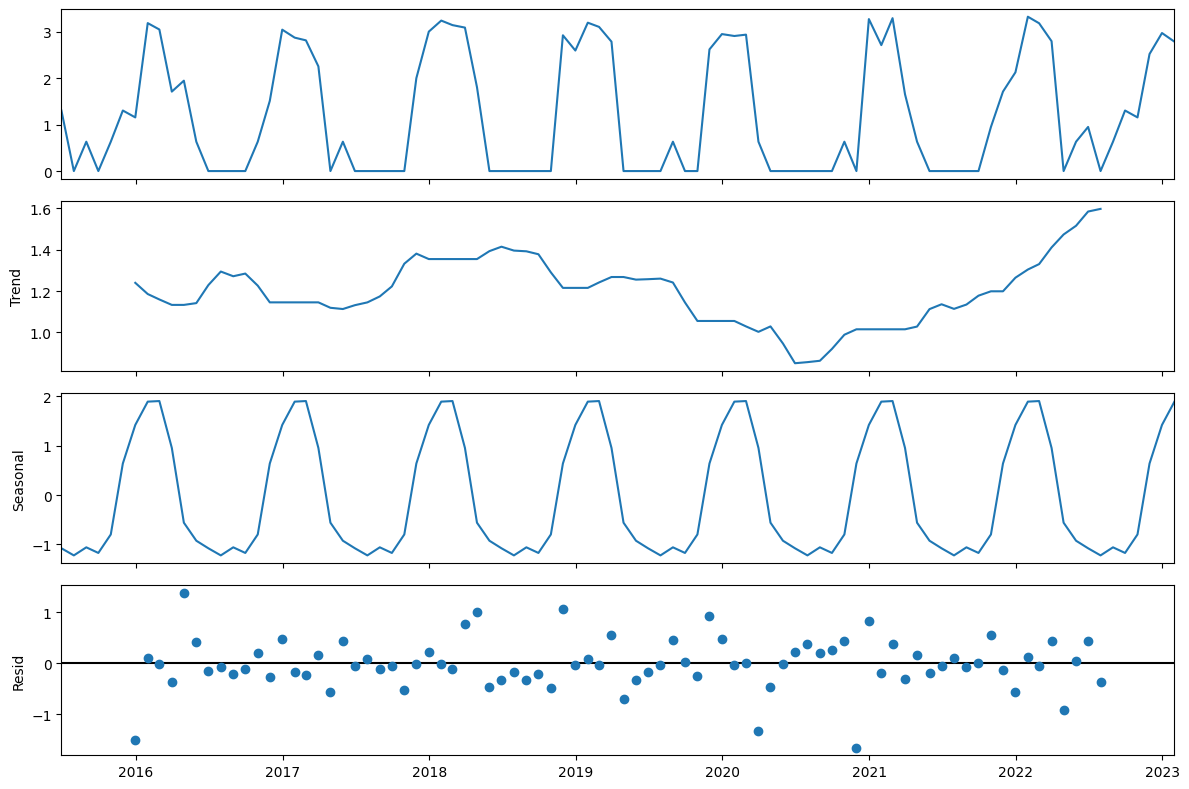

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


result = seasonal_decompose(train[['requests_transformed']], model='additive', period=12)


plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.tight_layout()
plt.show()

#### Plot ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function)
#### on the differenced transformed request data to help identify AR (p) and MA (q) parameters for SARIMA.

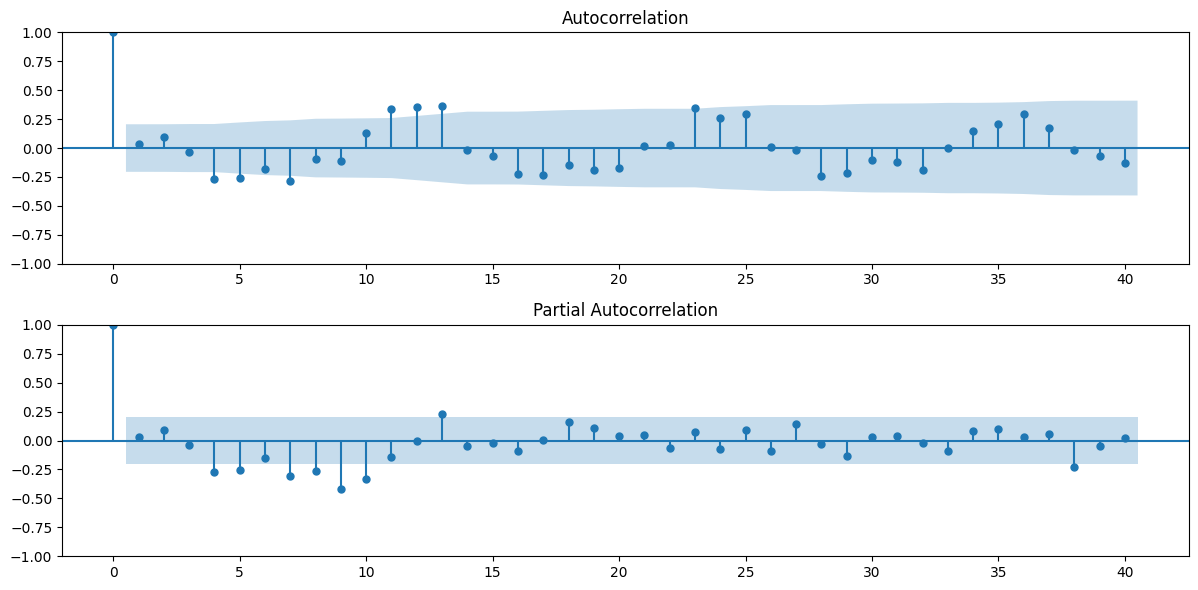

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


diff_ts = train[['requests_transformed']].diff().dropna()


plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(diff_ts, lags=40, ax=plt.gca())  
plt.subplot(212)
plot_pacf(diff_ts, lags=40, ax=plt.gca())
plt.tight_layout()
plt.show()

#### Use auto_arima to fit a SARIMA model with seasonal components and exogenous snowfall-related features.
#### Exogenous variables include standardized snowfall, lagged snowfall, and rolling average snowfall.
#### The model summary and diagnostic plots help evaluate fit quality and residuals behavior.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1423.842, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1343.345, Time=0.73 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.66 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1374.570, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1326.937, Time=1.43 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1320.154, Time=2.16 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.83 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=3.46 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=3.74 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.72 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=1314.740, Time=6.01 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=5.00 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1318.411, Time=1.99 sec
 ARIMA(2,1,0)(2,1,2)[12]             : AIC=1338.433, Time=5.32 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1337.9

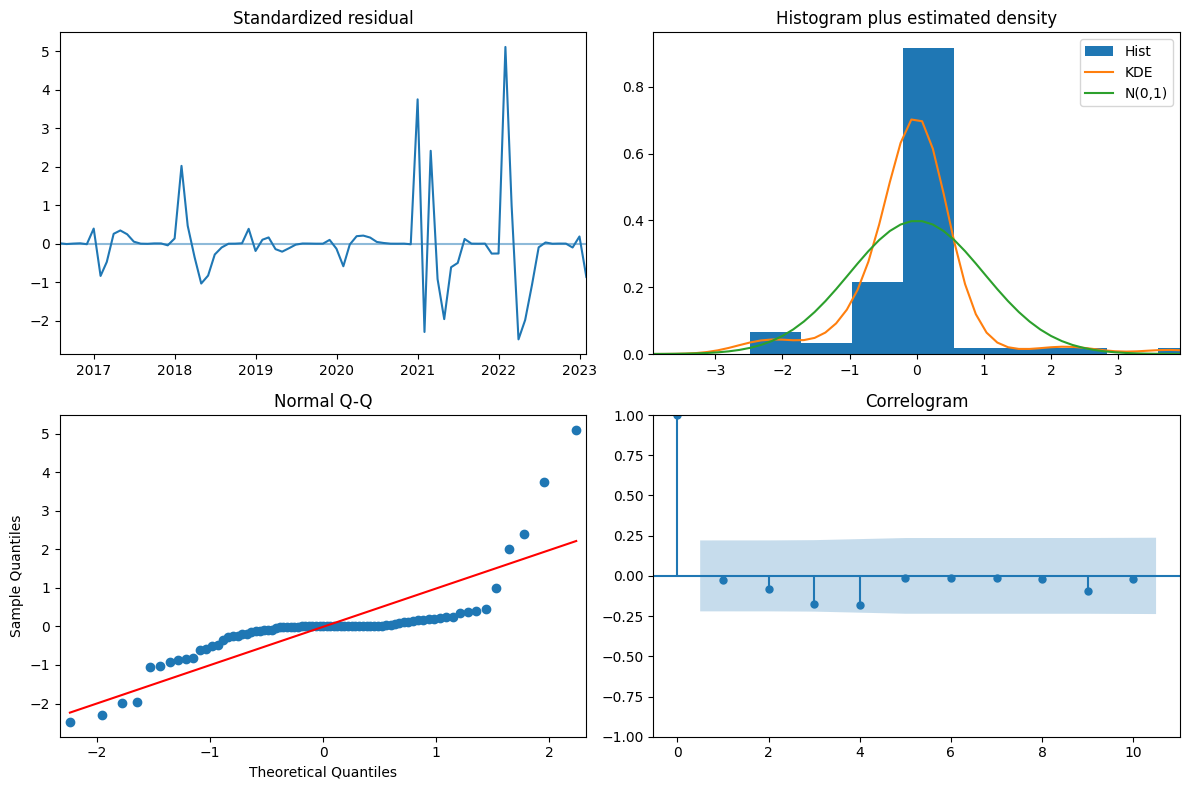

In [22]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

exog_features = ['snowfall_scaled', 'snow_lag1_scaled', 'snow_lag2_scaled','snow_ma3_scaled']
exog_data = train[exog_features]


model = auto_arima(
    train['num_requests'],
    exogenous=exog_data,
    seasonal=True,
    m=12,
    d=1,
    D=1,
    start_p=0, max_p=3,
    start_q=0, max_q=3,
    start_P=0, max_P=2,
    start_Q=0, max_Q=2,
    trace=True,
    stepwise=True,
    suppress_warnings=True
)

print(model.summary())
model.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

Standardized Residuals (Top-Left):
Most residuals fluctuate randomly around zero, with some spikes — mostly acceptable.

Histogram + KDE (Top-Right):
Residuals roughly follow a normal distribution, though slightly skewed.

Normal Q-Q Plot (Bottom-Left):
Residuals follow the diagonal line fairly well, but deviate in the tails, suggesting some non-normality in extreme values.

Correlogram (Bottom-Right):
ACF of residuals shows no clear patterns; most values fall within the confidence band, confirming white noise residuals.

#### Manually fit a SARIMAX model(train data set) with the best parameter set identified by auto_arima.
#### Includes external regressors (snowfall features) and seasonal order (2,1,1,12).

In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=train['num_requests'],
               exog=train[exog_features],
               order=(3,1,0),
               seasonal_order=(2,1,1,12))
results = model.fit()

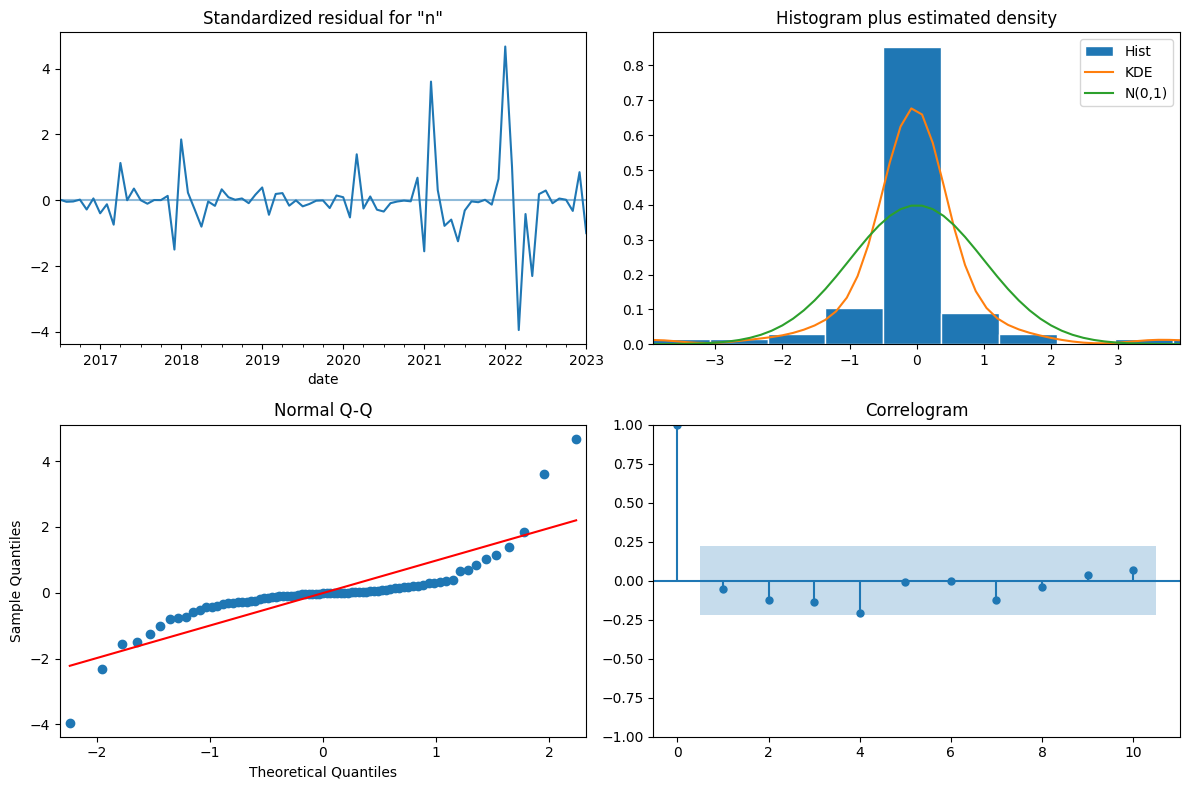

In [78]:
results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

#### Generate SARIMAX predictions for the test set using the fitted model and exogenous snowfall features.
#### Define a custom function to calculate evaluation metrics: MAE, RMSE, MAPE, and sMAPE.

In [79]:
from scipy.special import inv_boxcox
forecast = results.get_forecast(steps=test_size,
                              exog=test[exog_features])
y_pred = forecast.predicted_mean
y_pred = y_pred.clip(lower=0)
y_true = test['num_requests']

In [80]:
import numpy as np
import pandas as pd

def calculate_metrics(y_true, y_pred):
    """
    Calculate common regression evaluation metrics: MAE, RMSE, MAPE, and sMAPE.

    Parameters:
    -----------
    y_true : The ground truth (actual) values.
    y_pred : The predicted values.

    Returns:
    --------
    dict
        A dictionary containing the following metrics:
        - 'MAE' : Mean Absolute Error
        - 'RMSE' : Root Mean Squared Error
        - 'MAPE(%)' : Mean Absolute Percentage Error (as a percentage)
        - 'sMAPE(%)' : Symmetric Mean Absolute Percentage Error (as a percentage)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)


    mask = y_true != 0


    mae = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]))* 100
    smape = np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100

    return {
        'MAE': round(mae, 4),
        'RMSE': round(rmse, 4),
        'MAPE(%)': round(mape, 2),
        'sMAPE(%)': round(smape, 2)
    }

In [81]:
metrics = calculate_metrics(y_true, y_pred)

print("result:")
for k, v in metrics.items():
    print(f"{k}: {v}")

result:
MAE: 76.3811
RMSE: 189.7771
MAPE(%): 108.0
sMAPE(%): 178.62


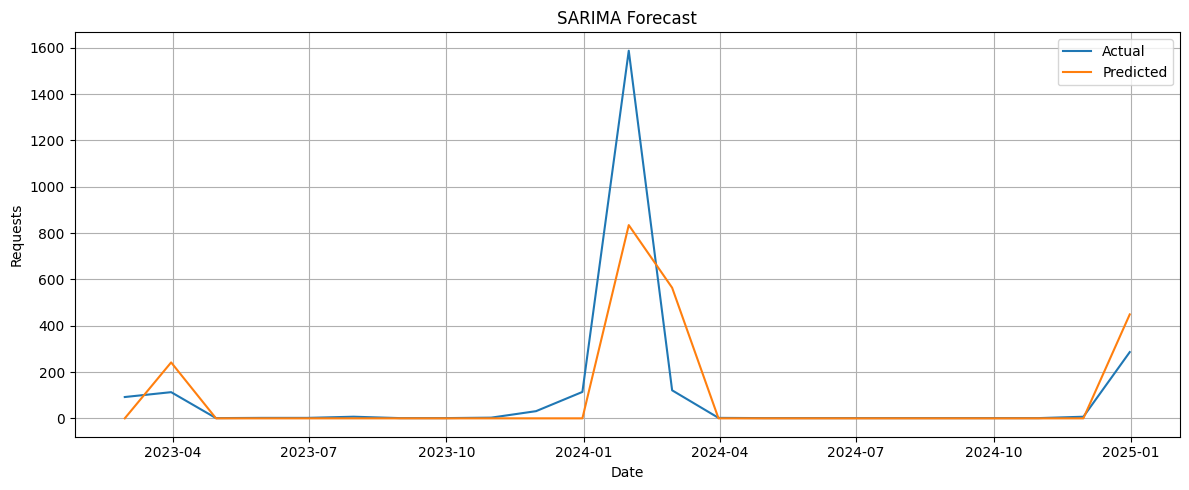

In [84]:
plt.figure(figsize=(12, 5))
plt.plot(y_true.index, y_true.values, label='Actual')
plt.plot(y_true.index, y_pred, label='Predicted')
plt.title(f'SARIMA Forecast')
plt.xlabel("Date")
plt.ylabel("Requests")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# random forest

### Daily datasets of the Random Forest model

#### Convert the time series into a DataFrame and reset index to expose 'date' as a column.
#### Create time-based features to capture seasonal patterns and weekly cycles:
####   - dayofweek, month, dayofyear
####   - is_weekend: binary feature indicating Saturday/Sunday
####   - is_winter: binary feature for winter months (Dec–Feb)
#### Add lag features to capture temporal dependencies in request volume:
####   - 1-day, 7-day, and 365-day lags

In [32]:
df_rf = ts.to_frame().reset_index()
df_rf.columns = ['date', 'num_requests']


In [33]:
df_rf['dayofweek'] = df_rf['date'].dt.dayofweek
df_rf['month'] = df_rf['date'].dt.month
df_rf['dayofyear'] = df_rf['date'].dt.dayofyear
df_rf['is_weekend'] = df_rf['dayofweek'].isin([5, 6]).astype(int)
df_rf['is_winter'] = df_rf['month'].isin([12, 1, 2]).astype(int)

In [34]:
df_rf['lag_1'] = df_rf['num_requests'].shift(1)
df_rf['lag_7'] = df_rf['num_requests'].shift(7)
df_rf['lag_365'] = df_rf['num_requests'].shift(365)

In [36]:
df_rf.dropna(inplace=True)

In [37]:
df_rf

,date,num_requests,dayofweek,month,dayofyear,is_weekend,is_winter,lag_1,lag_7,lag_365
365,2016-04-21,0.0,3,4,112,0,0,0.0,0.0,1.0
366,2016-04-22,0.0,4,4,113,0,0,0.0,0.0,0.0
367,2016-04-23,0.0,5,4,114,1,0,0.0,0.0,0.0
368,2016-04-24,0.0,6,4,115,1,0,0.0,0.0,0.0
369,2016-04-25,0.0,0,4,116,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3522,2024-12-12,38.0,3,12,347,0,1,2.0,108.0,2.0
3523,2024-12-13,49.0,4,12,348,0,1,38.0,48.0,4.0
3524,2024-12-14,0.0,5,12,349,1,1,49.0,0.0,1.0
3525,2024-12-15,0.0,6,12,350,1,1,0.0,0.0,0.0


#### Perform hyperparameter tuning for Random Forest using GridSearchCV with TimeSeriesSplit (no shuffling).
#### Search over combinations of n_estimators, max_depth, and min_samples_leaf.
#### Use RMSE (neg_root_mean_squared_error) as the scoring metric.
#### After fitting, print the best parameter set and display all parameter combinations sorted by RMSE.

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


X = df_rf.drop(columns=['num_requests','date'])
y = df_rf['num_requests']


split_idx = int(0.8 * len(X))
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

633

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 8, 12],
    'min_samples_leaf': [1, 3, 5]
}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Score (neg RMSE):", grid_search.best_score_)
results = pd.DataFrame(grid_search.cv_results_)
results['mean_test_rmse'] = -results['mean_test_score']
results = results.sort_values('mean_test_rmse')
print("\nAll Grid Search Results (sorted by RMSE):")
print(results[['param_n_estimators', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_rmse']])

Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 200}
Best Score (neg RMSE): -54.5410477059091

All Grid Search Results (sorted by RMSE):
    param_n_estimators  param_max_depth  param_min_samples_leaf  \
1                  200                5                       1   
0                  100                5                       1   
5                  200                5                       5   
6                  100                8                       1   
7                  200                8                       1   
4                  100                5                       5   
11                 200                8                       5   
17                 200               12                       5   
10                 100                8                       5   
16                 100               12                       5   
3                  200                5                       3   
13                 200               1

In [53]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    min_samples_leaf=1,
    random_state=42
)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


metrics = calculate_metrics(y_test, y_pred)

print("result:")
for k, v in metrics.items():
    print(f"{k}: {v}")

result:
MAE: 4.2217
RMSE: 19.2908
MAPE(%): 415.18
sMAPE(%): 186.06


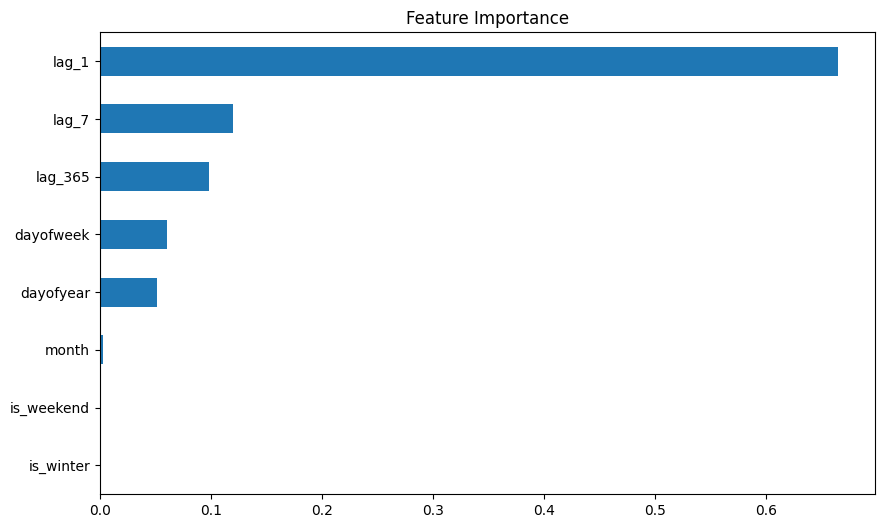

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
pd.Series(rf.feature_importances_, index=X.columns) \
  .sort_values() \
  .plot(kind='barh')
plt.title('Feature Importance')
plt.show()

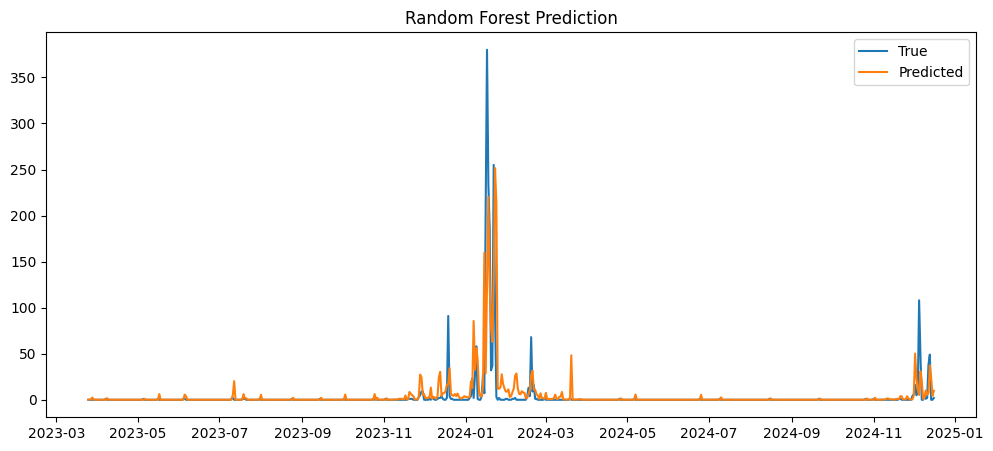

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df_rf['date'].iloc[split_idx:], y_test.values, label='True')
plt.plot(df_rf['date'].iloc[split_idx:], y_pred, label='Predicted')
plt.title('Random Forest Prediction')
plt.legend()
plt.show()


### Monthly datasets of the Random Forest model

#### Copy the monthly dataset to a new DataFrame
#### Create lag features for both num_requests and snowfall (1 to 3 months)
#### Add rolling average features for snowfall and request volume

In [79]:
df_rf_monthly = df_all.copy()
df
for i in range(1, 4):
    df_rf_monthly[f'req_lag_{i}'] = df_rf_monthly['num_requests'].shift(i)
    df_rf_monthly[f'snow_lag_{i}'] = df_rf_monthly['snowfall'].shift(i)

In [80]:
df_rf_monthly['snow_roll3'] = df_rf_monthly['snowfall'].rolling(window=3).mean()
df_rf_monthly['req_roll3'] = df_rf_monthly['num_requests'].rolling(window=3).mean()

In [81]:
df_rf_monthly.dropna(inplace=True)
X = df_rf_monthly.drop(columns='num_requests')
y = df_rf_monthly['num_requests']

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

#### Define parameter grid for tuning Random Forest
#### Use GridSearchCV with TimeSeriesSplit to avoid future-data leakage

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 8, 12],
    'min_samples_leaf': [1, 3, 5]
}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Params(monthly):", grid_search.best_params_)
print("Best Score (neg RMSE):", grid_search.best_score_)
results = pd.DataFrame(grid_search.cv_results_)
results['mean_test_rmse'] = -results['mean_test_score']
results = results.sort_values('mean_test_rmse')
print("\nAll Grid Search Results (sorted by RMSE):")
print(results[['param_n_estimators', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_rmse']])

Best Params(monthly): {'max_depth': 12, 'min_samples_leaf': 1, 'n_estimators': 200}
Best Score (neg RMSE): -587.9219667955206

All Grid Search Results (sorted by RMSE):
    param_n_estimators  param_max_depth  param_min_samples_leaf  \
13                 200               12                       1   
1                  200                5                       1   
7                  200                8                       1   
12                 100               12                       1   
6                  100                8                       1   
0                  100                5                       1   
14                 100               12                       3   
8                  100                8                       3   
2                  100                5                       3   
9                  200                8                       3   
15                 200               12                       3   
3                  200     

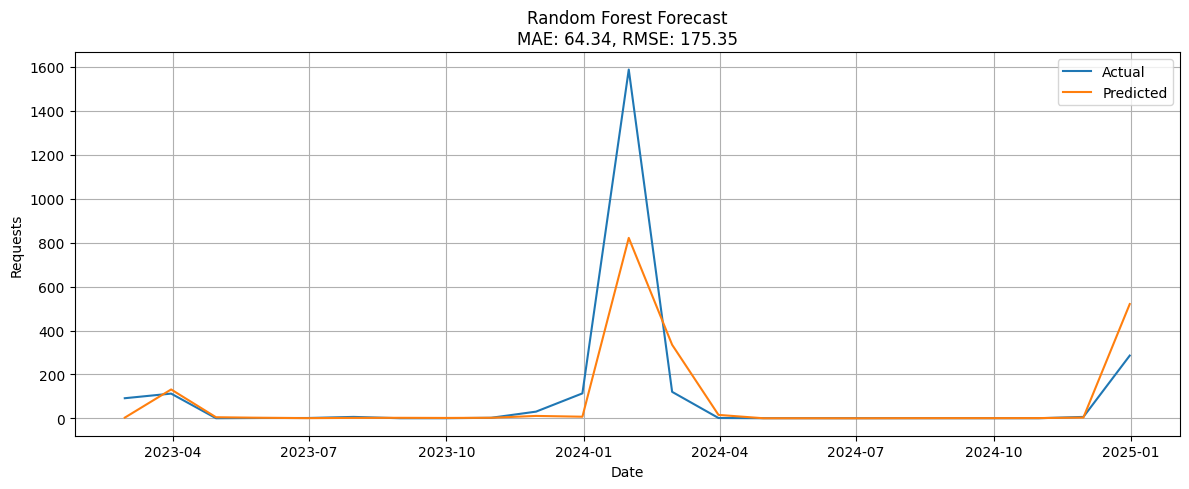

result:
MAE: 64.3445
RMSE: 175.3471
MAPE(%): 105.79
sMAPE(%): 67.34


In [77]:

model = RandomForestRegressor(n_estimators=200,
    max_depth=12,
    min_samples_leaf=1,
    random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)


plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title(f'Random Forest Forecast\nMAE: {mae:.2f}, RMSE: {rmse:.2f}')
plt.xlabel("Date")
plt.ylabel("Requests")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance.head(10)

metrics = calculate_metrics(y_test, y_pred)

print("result:")
for k, v in metrics.items():
    print(f"{k}: {v}")

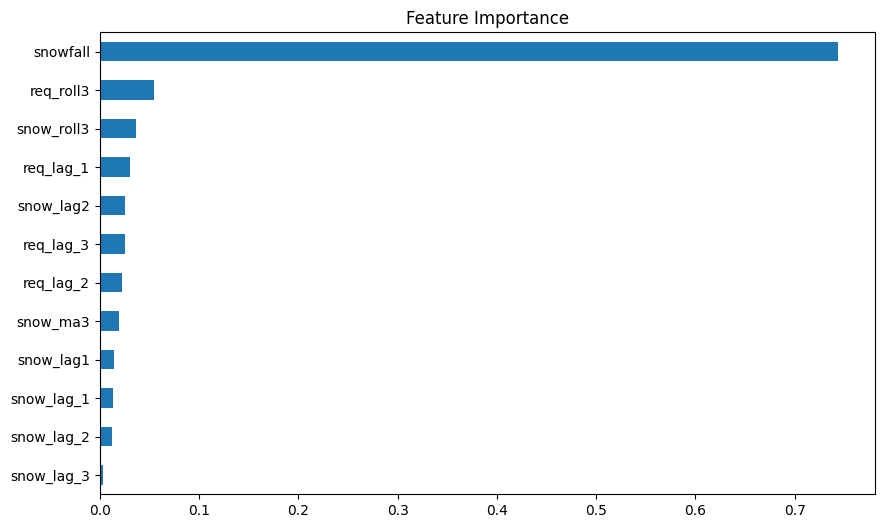

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
pd.Series(model.feature_importances_, index=X.columns) \
  .sort_values() \
  .plot(kind='barh')
plt.title('Feature Importance')
plt.show()

# prophet

## Daily datasets of the prophet model

#### Prophet requires the input dataframe to have two columns:
#### ds for the datetime
#### y for the target variable

In [42]:
df_prophet = ts.reset_index()
df_prophet.columns = ['ds', 'y']
df_prophet

,ds,y
0,2015-04-22,1.0
1,2015-04-23,0.0
2,2015-04-24,0.0
3,2015-04-25,0.0
4,2015-04-26,0.0
...,...,...
3522,2024-12-12,38.0
3523,2024-12-13,49.0
3524,2024-12-14,0.0
3525,2024-12-15,0.0


#### Fit a Prophet model on daily request data using multiplicative seasonality.
#### Split last 300 days as test set; use the rest for training.
#### Include built-in yearly and weekly seasonality, with US holidays.
#### Predict the next 300 days and evaluate forecast using MAE, RMSE, MAPE, and sMAPE.

In [44]:

from prophet import Prophet
train_df = df_prophet.iloc[:-633]
test_df = df_prophet.iloc[-633:]

model_prophet = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)
model_prophet.add_country_holidays(country_name='US')
model_prophet.fit(train_df)

future = model_prophet.make_future_dataframe(periods=300, freq='D')
forecast = model_prophet.predict(future)


forecast['yhat'] = forecast['yhat'].clip(lower=0)
y_pred = forecast.iloc[-633:]['yhat'].values
y_true = test_df['y'].values

metrics = calculate_metrics(y_true, y_pred)

print("result:")
for k, v in metrics.items():
    print(f"{k}: {v}")

05:29:55 - cmdstanpy - INFO - Chain [1] start processing
05:29:56 - cmdstanpy - INFO - Chain [1] done processing


result:
MAE: 5.8957
RMSE: 25.1042
MAPE(%): 259.4
sMAPE(%): nan


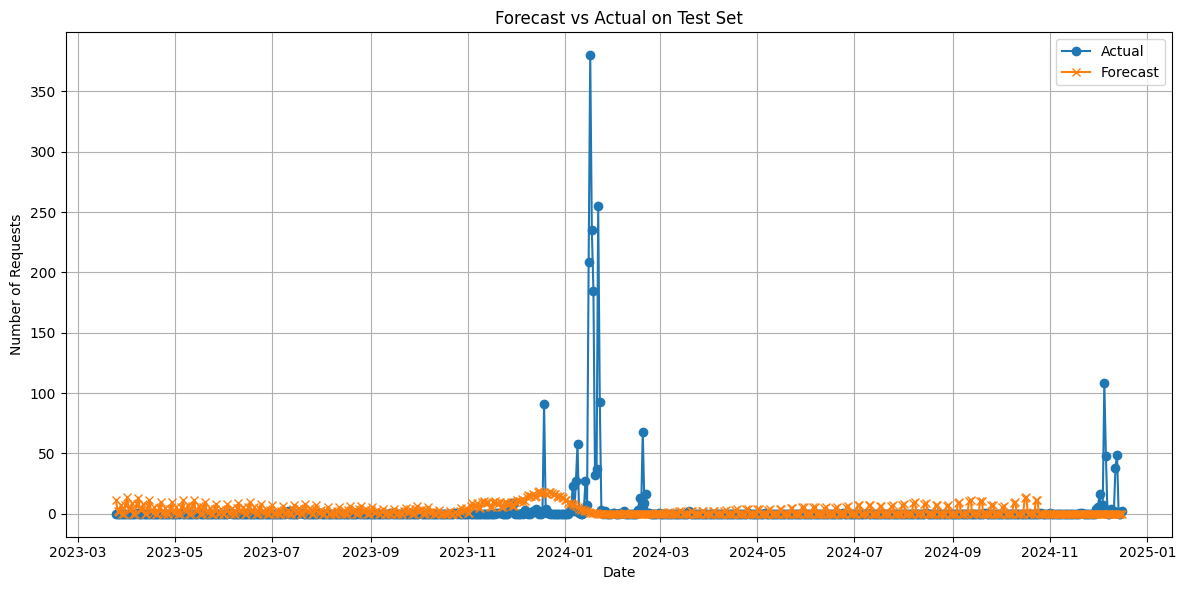

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(test_df['ds'], test_df['y'], label='Actual', marker='o')
plt.plot(test_df['ds'], forecast.iloc[-633:]['yhat'], label='Forecast', marker='x')
plt.title('Forecast vs Actual on Test Set')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Monthly datasets of the prophet model

### Monthly datasets with feature engineering

#### Prepare monthly-level data for Prophet with external regressors.
#### Rename columns to 'ds' and 'y' as required by Prophet.
#### Include scaled snowfall and its lagged/rolling features as additional regressors.
#### Split the data into training and testing sets, then extract 'future' exogenous features for prediction.

In [48]:
df_prophet_monthly = df_all.reset_index()
df_prophet_monthly
df_pro_train = train[['num_requests','snowfall_scaled','snow_lag1_scaled','snow_lag2_scaled','snow_ma3_scaled']].reset_index()
df_pro_train.columns=['ds','y','snowfall_scaled','snow_lag1_scaled','snow_lag2_scaled','snow_ma3_scaled']
df_pro_test = test[['num_requests','snowfall_scaled','snow_lag1_scaled','snow_lag2_scaled','snow_ma3_scaled']].reset_index()
df_pro_test.columns=['ds','y','snowfall_scaled','snow_lag1_scaled','snow_lag2_scaled','snow_ma3_scaled']
future = df_pro_test.drop(columns='y')
future

,ds,snowfall_scaled,snow_lag1_scaled,snow_lag2_scaled,snow_ma3_scaled
0,2023-02-28,-0.553826,0.894698,-0.043931,0.129101
1,2023-03-31,-0.028734,-0.539186,0.898527,0.144958
2,2023-04-30,-0.571933,-0.012824,-0.533285,-0.489341
3,2023-05-31,-0.571933,-0.557337,-0.007683,-0.497270
4,2023-06-30,-0.590040,-0.557337,-0.551409,-0.743061
5,2023-07-31,-0.590040,-0.575487,-0.551409,-0.750990
6,2023-08-31,-0.590040,-0.575487,-0.569533,-0.758918
7,2023-09-30,-0.590040,-0.575487,-0.569533,-0.758918
8,2023-10-31,-0.571933,-0.575487,-0.569533,-0.750990
9,2023-11-30,-0.481400,-0.557337,-0.569533,-0.703417


#### Train a Prophet model on monthly data including snowfall-based external regressors.
#### Use additive seasonality and include yearly seasonality and U.S. public holidays.
#### After fitting on the training set, predict on the test set and evaluate forecast accuracy.

In [49]:

from prophet import Prophet


model_prophet_monthly = Prophet(
    growth='linear',
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

model_prophet_monthly.add_country_holidays(country_name='US')
model_prophet_monthly.add_regressor('snowfall_scaled')
model_prophet_monthly.add_regressor('snow_lag1_scaled')
model_prophet_monthly.add_regressor('snow_lag2_scaled')
model_prophet_monthly.add_regressor('snow_ma3_scaled')
model_prophet_monthly.fit(df_pro_train)

forecast = model_prophet_monthly.predict(future)



forecast['yhat'] = forecast['yhat'].clip(lower=0)
y_pred = forecast.iloc[-23:]['yhat'].values
y_true = df_pro_test['y'].values

metrics = calculate_metrics(y_true, y_pred)

print("result:")
for k, v in metrics.items():
    print(f"{k}: {v}")

05:34:30 - cmdstanpy - INFO - Chain [1] start processing
05:34:30 - cmdstanpy - INFO - Chain [1] done processing


result:
MAE: 100.9217
RMSE: 129.7913
MAPE(%): 4403.87
sMAPE(%): 164.44


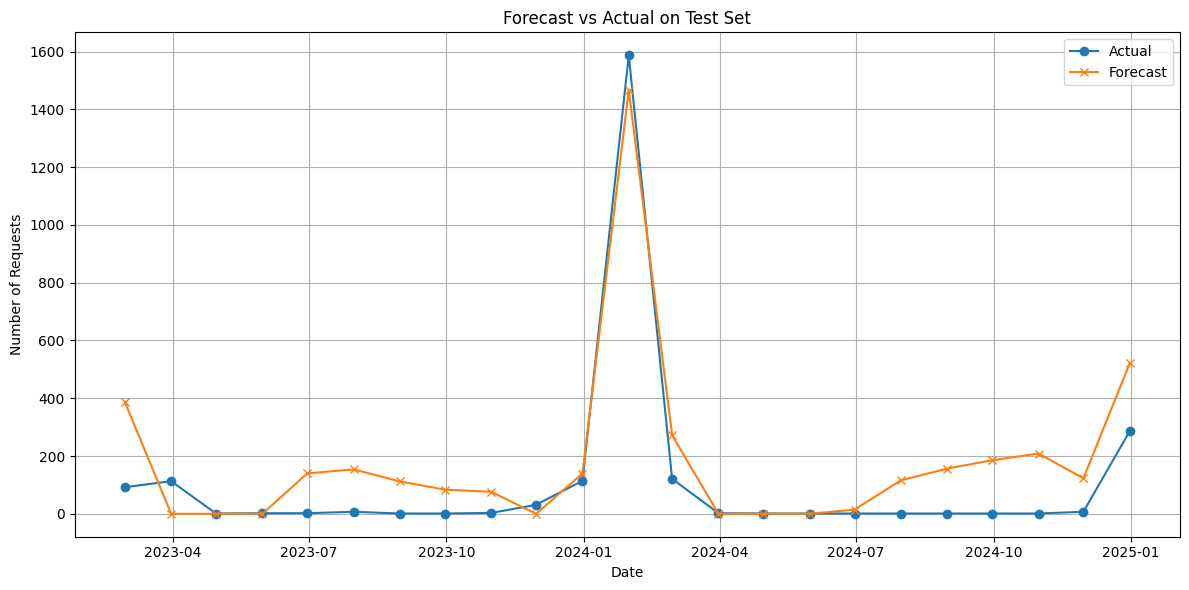

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df_pro_test['ds'], df_pro_test['y'], label='Actual', marker='o')
plt.plot(df_pro_test['ds'], y_pred, label='Forecast', marker='x')
plt.title('Forecast vs Actual on Test Set')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Monthly datasets without feature engineering

#### Prophet baseline model using monthly data without feature engineering.
#### Only 'snowfall' is included as a single external regressor.
#### Model uses additive seasonality, yearly cycle, and no lag or rolling features.
#### Train on first 23 months, test on last 23 months.

In [51]:
from prophet import Prophet

df_prophet_monthly = df_all_snow.reset_index()
df_prophet_monthly.columns = ['ds', 'y','snowfall']

train_df = df_prophet_monthly.iloc[:-23]
test_df = df_prophet_monthly.iloc[-23:]

model_prophet_monthly = Prophet(
    growth='linear',
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

model_prophet_monthly.add_regressor('snowfall')
model_prophet_monthly.fit(train_df)

future = model_prophet_monthly.make_future_dataframe(periods=24, freq='M')


05:36:34 - cmdstanpy - INFO - Chain [1] start processing
05:36:35 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
future = df_prophet_monthly[['ds', 'snowfall']]


forecast = model_prophet_monthly.predict(future)

In [56]:
y_true = test_df['y'].values
y_pred = forecast.iloc[-23:]['yhat'].values
y_pred = np.where(y_pred < 0, 0, y_pred)


metrics = calculate_metrics(y_true, y_pred)

print("result:")
for k, v in metrics.items():
    print(f"{k}: {v}")

result:
MAE: 131.1794
RMSE: 164.4656
MAPE(%): 6559.14
sMAPE(%): 162.33


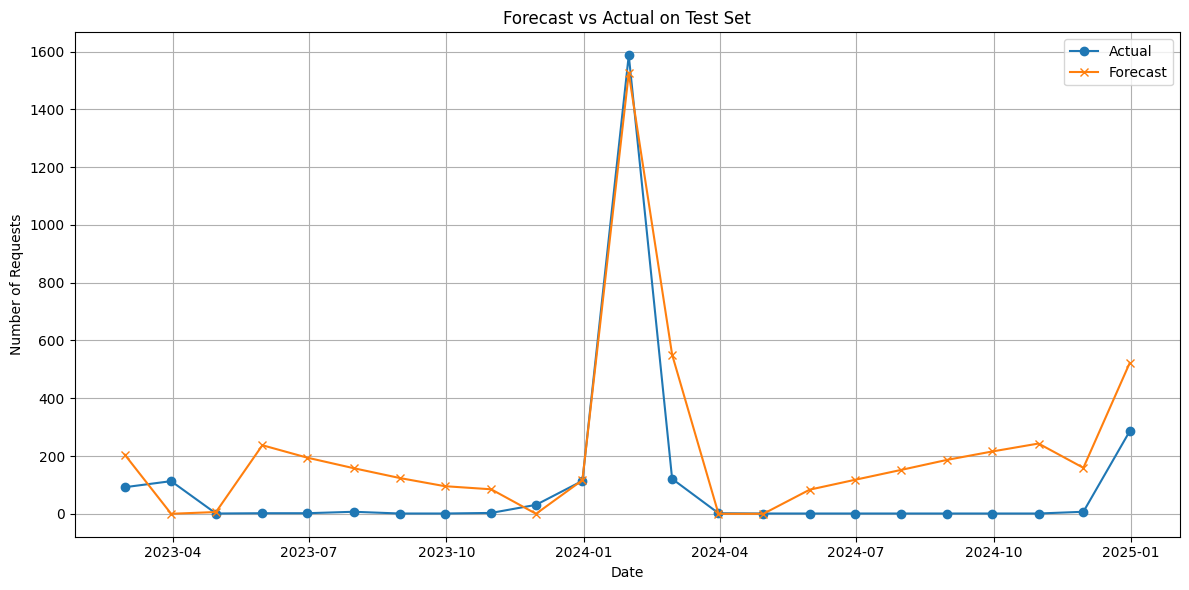

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(test_df['ds'], test_df['y'], label='Actual', marker='o')
plt.plot(test_df['ds'], y_pred, label='Forecast', marker='x')
plt.title('Forecast vs Actual on Test Set')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()